# GEDI Subsetting Use Case

This notebook demonstrates using modified ORNL DAAC code to run a subset of GEDI data for a given polygon (country).

1. Query CMR for granules
2. Download granules
3. Subset each granule (parallel)
4. Combine the subsets

In [7]:
import os

# These lists will never match, since some granules have 0 returns
folder_path = "/projects/my-public-bucket/gedi-l4a/gabon"
file_list = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if file.endswith("h5")
]
print(len(file_list))

file_list_fgb = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if file.endswith("fgb")
]
print(len(file_list_fgb))

1009
467


In [5]:
# Look for where in the h5 list the last fgb file occurs to see how many are done
file_list.index(file_list_fgb[-1].replace("fgb", "h5"))

992

In [6]:
file_list_fgb[-1]

'/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2021194171304_O14639_01_T11287_02_002_01_V002.fgb'

In [13]:
file_list[9:12]

['/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2019114135421_O02061_04_T00905_02_002_01_V002.h5',
 '/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2019115021551_O02069_01_T03606_02_002_01_V002.h5',
 '/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2019115021551_O02069_02_T03606_02_002_01_V002.h5']

# Reviewing Results

In [11]:
import geopandas as gpd
import dask_geopandas
import matplotlib.pyplot as plt

In [6]:
# TOO big to open in memory
# gedi_gabon = gpd.read_file("/projects/shared-buckets/alexdevseed/gedi-l4a/gabon.gpkg")

!ogr2ogr -sql 'SELECT * FROM gabon WHERE l4_quality_flag = 1 AND sensitivity > 0.95;' -f GPKG /projects/tmp/gabon_q1.gpkg /projects/shared-buckets/alexdevseed/gedi-l4a/gabon.gpkg

	- 'VirtualXPath'	[XML Path Language - XPath]
	- 'VirtualXPath'	[XML Path Language - XPath]


In [14]:
# Still too big
gedi_gabon = gpd.read_file("/projects/tmp/gabon_q1.gpkg", rows=1000000)

In [ ]:
# needs pyogrio but can't install it
# ddf = dask_geopandas.read_file("/projects/tmp/gabon_q1.gpkg", npartitions=4)

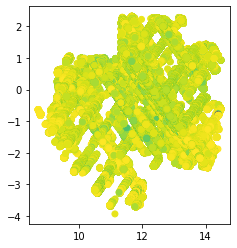

In [15]:
agbd_colors = plt.cm.get_cmap("viridis_r")
gedi_gabon.plot(column="agbd", cmap=agbd_colors);